In [17]:
import requests

In [18]:
response = requests.get("http://localhost:9090/weather-stations")

In [19]:
import pandas as pd

In [20]:
if response.status_code == 200:
    stations_data = response.json()
    df_stations = pd.DataFrame(stations_data['stations'])
    
    # Define approximate latitude and longitude ranges for Melbourne
    melbourne_lat_range = (-38.1, -37.5)
    melbourne_lon_range = (144.5, 145.5)

    # Filter stations in Melbourne
    melbourne_stations = df_stations[
        (df_stations['lat'] >= melbourne_lat_range[0]) & 
        (df_stations['lat'] <= melbourne_lat_range[1]) &
        (df_stations['lon'] >= melbourne_lon_range[0]) & 
        (df_stations['lon'] <= melbourne_lon_range[1])
    ]
    
    print("Melbourne Stations:")
    print(melbourne_stations[['wmo', 'name']])
else:
    print(f"Failed to retrieve weather stations: {response.status_code}")
    print(response.text)

Melbourne Stations:
      wmo                      name
18  94847              Point Wilson
32  94864                Coldstream
33  94865                  Laverton
34  94866         Melbourne Airport
35  94870         Moorabbin Airport
37  94872               Ferny Creek
80  95864     St Kilda Harbour RMYS
81  95866          Essendon Airport
82  95867                  Scoresby
83  95872            Fawkner Beacon
84  95874                  Viewbank
93  95936  Melbourne (Olympic Park)
94  95941                Point Cook


In [22]:
station_ids = [94847, 94866]  # Point Wilson and Melbourne Airport
year = 2024
month = 5

# List to store data for both stations
station_data_list = []

# Fetch data for each station
for station_id in station_ids:
    url = f"http://localhost:9090/weather-stations/{station_id}?year={year}&month={month}"
    response = requests.get(url)
    if response.status_code == 200:
        station_data = response.json()
        df_station_data = pd.DataFrame(station_data)
        df_station_data['station_id'] = station_id
        df_station_data['station_name'] = 'Point Wilson' if station_id == 94847 else 'Melbourne Airport'
        station_data_list.append(df_station_data)
    else:
        print(f"Failed to retrieve data for station {station_id}: {response.status_code}")
        print(response.text)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_stations_data = pd.concat(station_data_list)
df_stations_data['date_filter'] = pd.to_datetime(df_stations_data['date_filter'])
print(df_stations_data.head())

       max_temperature  avg_wind_speed_kmh  max_wind_speed_kmh  \
end                NaN           13.621864                37.0   
start              NaN           13.621864                37.0   
end               19.9            9.738059                20.0   
start             19.9            9.738059                20.0   

       min_wind_speed_kmh  avg_temperature  min_temperature  \
end                   0.0              NaN              NaN   
start                 0.0              NaN              NaN   
end                   0.0        12.064561              5.3   
start                 0.0        12.064561              5.3   

              date_filter  station_id       station_name  
end   2024-05-31 23:59:59       94847       Point Wilson  
start 2024-05-01 00:00:00       94847       Point Wilson  
end   2024-05-31 23:59:59       94866  Melbourne Airport  
start 2024-05-01 00:00:00       94866  Melbourne Airport  


C:\Users\brian\AppData\Local\Temp\ipykernel_6376\2219991234.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_stations_data = pd.concat(station_data_list)


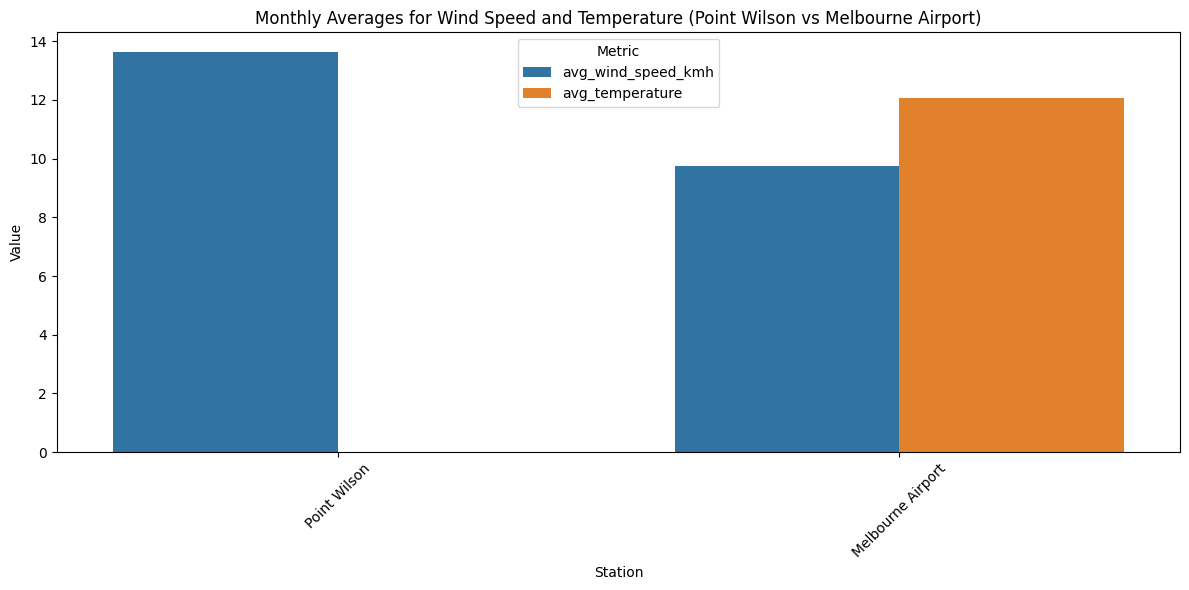

In [25]:
df_summary = df_stations_data[['station_name', 'avg_wind_speed_kmh', 'avg_temperature']].copy()
df_summary = df_summary.melt(id_vars='station_name', var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 6))
sns.barplot(x='station_name', y='Value', hue='Metric', data=df_summary)
plt.title('Monthly Averages for Wind Speed and Temperature (Point Wilson vs Melbourne Airport)')
plt.xlabel('Station')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

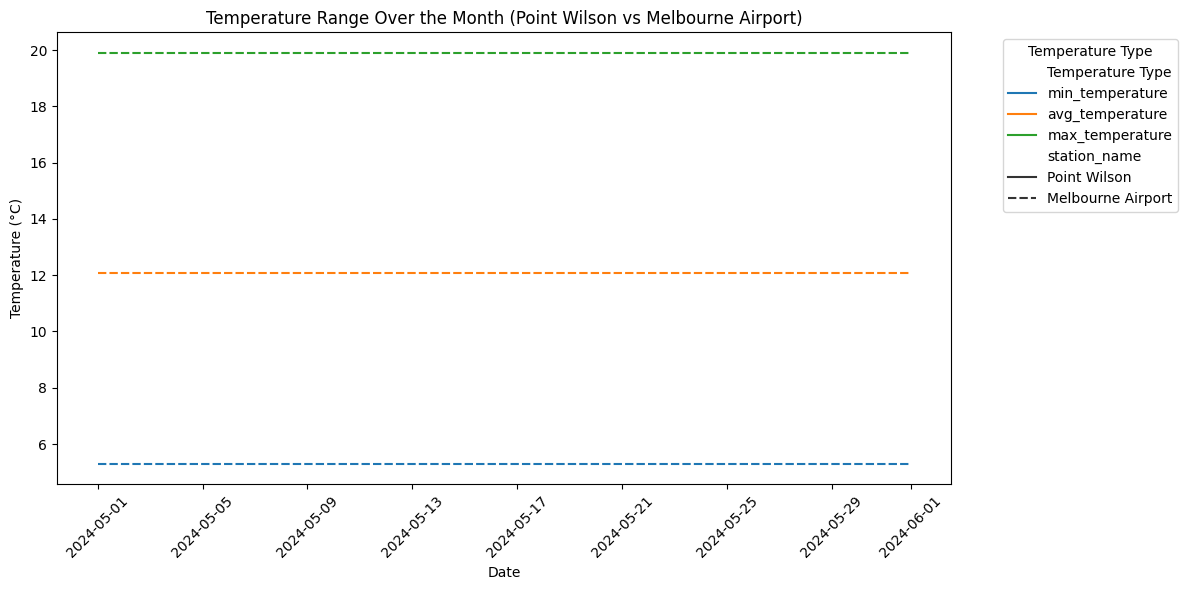

In [26]:
df_temp_range = df_stations_data[['date_filter', 'station_name', 'min_temperature', 'avg_temperature', 'max_temperature']].copy()
df_temp_range = df_temp_range.melt(id_vars=['date_filter', 'station_name'], var_name='Temperature Type', value_name='Temperature')
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_filter', y='Temperature', hue='Temperature Type', style='station_name', data=df_temp_range)
plt.title('Temperature Range Over the Month (Point Wilson vs Melbourne Airport)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='Temperature Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

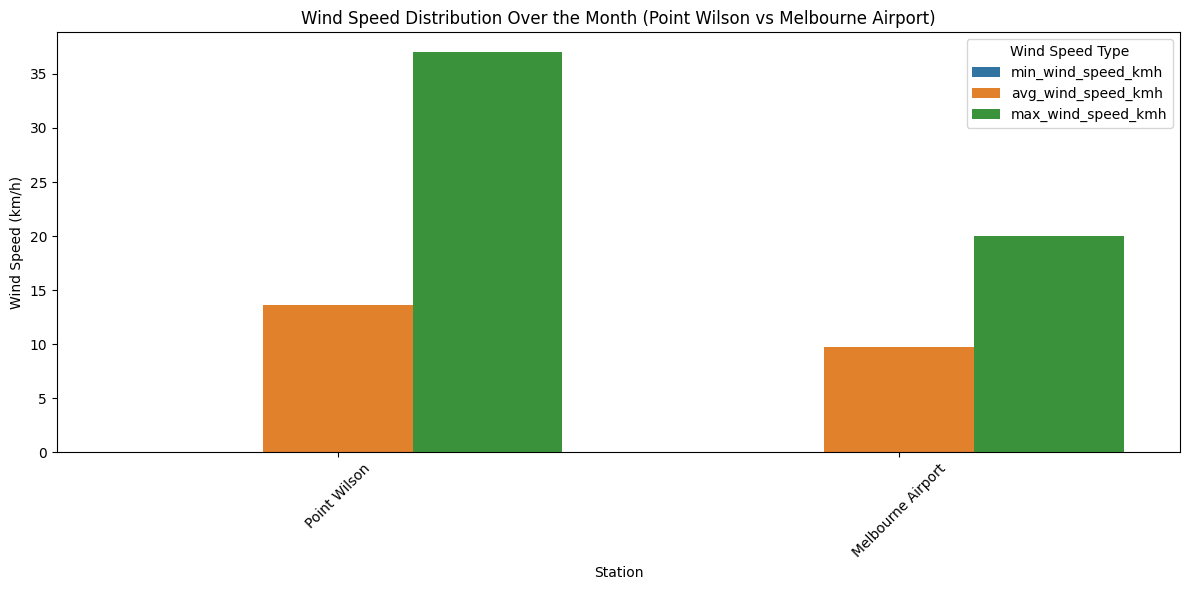

In [27]:
df_wind_speed = df_stations_data[['date_filter', 'station_name', 'min_wind_speed_kmh', 'avg_wind_speed_kmh', 'max_wind_speed_kmh']].copy()
df_wind_speed = df_wind_speed.melt(id_vars=['date_filter', 'station_name'], var_name='Wind Speed Type', value_name='Wind Speed (km/h)')
plt.figure(figsize=(12, 6))
sns.barplot(x='station_name', y='Wind Speed (km/h)', hue='Wind Speed Type', data=df_wind_speed)
plt.title('Wind Speed Distribution Over the Month (Point Wilson vs Melbourne Airport)')
plt.xlabel('Station')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.legend(title='Wind Speed Type')
plt.tight_layout()
plt.show()

In [21]:
station_id = 99806
year = 2024
month = 5

url = f"http://localhost:9090/weather-stations/{station_id}?year={year}&month={month}"

# Make the GET request to fetch data for the specified station and time period
response = requests.get(url)
if response.status_code == 200:
    station_data = response.json()
    df_station_data = pd.DataFrame(station_data)
    print(f"Data for Station {station_id} in {year}-{month}:")
    print(df_station_data.head())
    
    # Display the available variables
    print("Available Variables:")
    print(df_station_data.columns)
else:
    print(f"Failed to retrieve data for station {station_id}: {response.status_code}")
    print(response.text)

In [ ]:
df_summary = df_station_data[['avg_wind_speed_kmh', 'avg_temperature']].copy()
df_summary = df_summary.melt(var_name='Metric', value_name='Value')

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=df_summary)
plt.title('Monthly Averages for Wind Speed and Temperature')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

In [ ]:
df_temp_range = df_station_data[['date_filter', 'min_temperature', 'avg_temperature', 'max_temperature']].copy()
df_temp_range = df_temp_range.melt(id_vars='date_filter', var_name='Temperature Type', value_name='Temperature')
plt.figure(figsize=(10, 6))
sns.lineplot(x='date_filter', y='Temperature', hue='Temperature Type', data=df_temp_range)
plt.title('Temperature Range Over the Month')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [ ]:
df_wind_speed = df_station_data[['date_filter', 'min_wind_speed_kmh', 'avg_wind_speed_kmh', 'max_wind_speed_kmh']].copy()
df_wind_speed = df_wind_speed.melt(id_vars='date_filter', var_name='Wind Speed Type', value_name='Wind Speed (km/h)')
plt.figure(figsize=(10, 6))
sns.barplot(x='Wind Speed Type', y='Wind Speed (km/h)', data=df_wind_speed)
plt.title('Wind Speed Distribution Over the Month')
plt.xlabel('Wind Speed Type')
plt.ylabel('Wind Speed (km/h)')
plt.show()

In [ ]:
data = response.json()
print(data)

In [ ]:
df = pd.DataFrame(data)
print(df.head())

In [ ]:
print(df.info())
print(df.describe())

In [ ]:
from pandas import json_normalize

stations_data = data['stations']

# Normalize the nested JSON data
df_normalized = json_normalize(stations_data)

# Display the first few rows to verify the structure
print(df_normalized.head())

In [ ]:
print(df_normalized.info())
print(df_normalized.describe())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_normalized['lat'], bins=30)
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='lon', data=df_normalized)
plt.title('Latitude vs. Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='lon', data=df_normalized)
plt.title('Latitude vs. Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='name', data=df_normalized, order=df_normalized['name'].value_counts().index)
plt.title('Number of Weather Stations per Name')
plt.xlabel('Count')
plt.ylabel('Weather Station Name')
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster

map_center = [df_normalized['lat'].mean(), df_normalized['lon'].mean()]
station_map = folium.Map(location=map_center, zoom_start=6)

marker_cluster = MarkerCluster().add_to(station_map)

for idx, row in df_normalized.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['name']
    ).add_to(marker_cluster)

station_map.save('weather_stations_map.html')
station_map

In [ ]:
melbourne_lat_range = (-38.1, -37.5)
melbourne_lon_range = (144.5, 145.5) 

melbourne_stations = df_normalized[
    (df_normalized['lat'] >= melbourne_lat_range[0]) & 
    (df_normalized['lat'] <= melbourne_lat_range[1]) &
    (df_normalized['lon'] >= melbourne_lon_range[0]) & 
    (df_normalized['lon'] <= melbourne_lon_range[1])
]

print(melbourne_stations[['wmo', 'name']])

In [ ]:
from sklearn.cluster import KMeans

coords = df_normalized[['lat', 'lon']]

kmeans = KMeans(n_clusters=3)
df_normalized['cluster'] = kmeans.fit_predict(coords)

plt.figure(figsize=(10, 6))
plt.scatter(df_normalized['lon'], df_normalized['lat'], c=df_normalized['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Weather Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()